In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

(-0.1, 1.1)

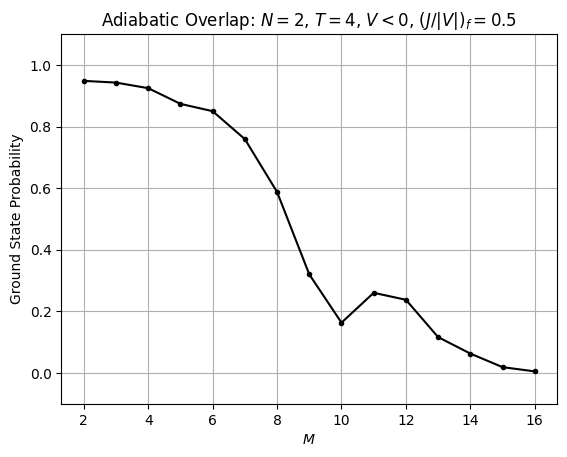

In [6]:
N = 2
V = -1
dt = 0.01

time_array = [1, 1, 1, 1]
J_V_ratios = [
    [0.1, 10],  # step 1
    [10, 10],   # step 2
    [10, 2],    # step 3
    [2, 0.5]    # step 4
]

mu_V_ratios = [
    [10, 10],  # step 1
    [10, 0],   # step 2
    [0, 0],    # step 3
    [0, 0]     # step 4
]

times, J_V_ratio_routine, mu_V_ratio_routine = make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt)

Ms = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
final_ground_state_probabilities = []

for M in Ms:
    adiabatic_energies, adiabatic_wavefunctions, adiabatic_probabilities, adiabatic_overlaps, true_energies = \
        simulate_adiabatic_evolution(N, M, V, mu_V_ratio_routine, J_V_ratio_routine, times, dt=dt, initial_state=None)
    final_ground_state_probabilities.append(adiabatic_probabilities[-1,0])

fig, ax = plt.subplots()
ax.plot(Ms, final_ground_state_probabilities, '.k')
ax.plot(Ms, final_ground_state_probabilities, '-k')
ax.grid()
ax.set_xlabel("$M$")
ax.set_ylabel("Ground State Probability")
ax.set_title(f"Adiabatic Overlap: $N={N}$, $T={sum(time_array)}$, $V<0$, $(J/|V|)_f = {J_V_ratios[-1][-1]}$")
ax.set_ylim(-0.1,1.1)

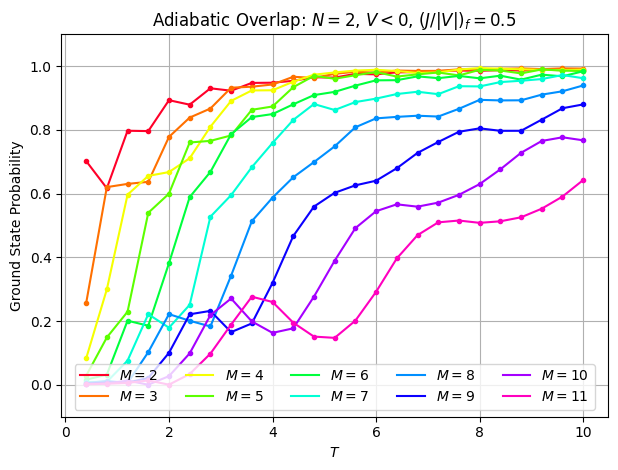

In [ ]:
N = 2 
V = -1
dt = 0.01

N = 2
V = -1
dt = 0.01

time_array = [1, 1, 1, 1]
J_V_ratios = [
    [0.1, 10],  # step 1
    [10, 10],   # step 2
    [10, 2],    # step 3
    [2, 0.5]    # step 4
]

mu_V_ratios = [
    [10, 10],  # step 1
    [10, 0],   # step 2
    [0, 0],    # step 3
    [0, 0]     # step 4
]


Ms = [2,3,4,5,6,7,8,9,10,11]
time_options = np.arange(0.1,2.6,0.1)
colors = get_cmap("gist_rainbow", len(Ms))

fig, ax = plt.subplots()
for idx, M in enumerate(Ms):
    final_ground_state_probabilities = []
    for time in time_options:
        time_array = [time, time, time, time]
        times, J_V_ratio_routine, mu_V_ratio_routine = make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt)

        adiabatic_energies, adiabatic_wavefunctions, adiabatic_probabilities, adiabatic_overlaps, true_energies = \
            simulate_adiabatic_evolution(N, M, V, mu_V_ratio_routine, J_V_ratio_routine, times, dt=dt, initial_state=None)
        final_ground_state_probabilities.append(adiabatic_probabilities[-1,0])
    
    ax.plot(4*time_options, final_ground_state_probabilities, '-', color = colors(idx), label = f"$M={M}$")
    ax.plot(4*time_options, final_ground_state_probabilities, '.', color = colors(idx))
    
ax.grid()
ax.set_xlabel("$T$")
ax.set_ylabel("Ground State Probability")
ax.set_title(f"Adiabatic Overlap: $N={N}$, $V<0$, $(J/|V|)_f = {J_V_ratios[-1][-1]}$")
ax.set_ylim(-0.1,1.1)
ax.legend(loc = "lower center", ncols = len(Ms)//2)
fig.tight_layout()


Starting calculations for N=2
Starting calculations for N=3
Starting calculations for N=4
  Completed step 1/25 for N=2, time=0.10
  Completed step 2/25 for N=2, time=0.20
  Completed step 3/25 for N=2, time=0.30
  Completed step 1/25 for N=3, time=0.10
  Completed step 4/25 for N=2, time=0.40
  Completed step 5/25 for N=2, time=0.50
  Completed step 6/25 for N=2, time=0.60
  Completed step 2/25 for N=3, time=0.20
  Completed step 1/25 for N=4, time=0.10
  Completed step 7/25 for N=2, time=0.70
  Completed step 8/25 for N=2, time=0.80
  Completed step 3/25 for N=3, time=0.30
  Completed step 9/25 for N=2, time=0.90
  Completed step 10/25 for N=2, time=1.00
  Completed step 11/25 for N=2, time=1.10
  Completed step 4/25 for N=3, time=0.40
  Completed step 2/25 for N=4, time=0.20
  Completed step 12/25 for N=2, time=1.20
  Completed step 13/25 for N=2, time=1.30
  Completed step 14/25 for N=2, time=1.40
  Completed step 5/25 for N=3, time=0.50
  Completed step 15/25 for N=2, time=1.50
  

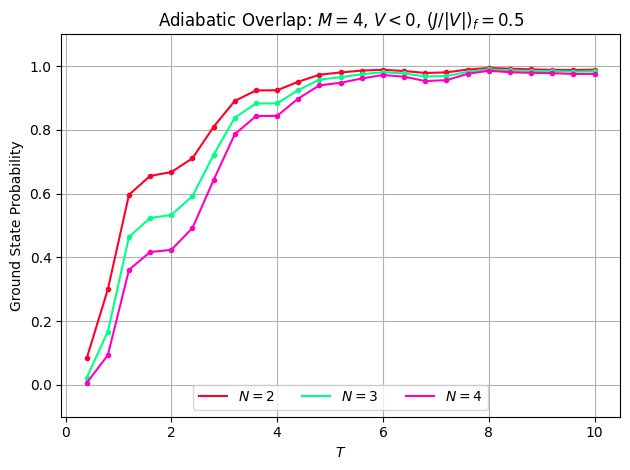

In [2]:
from concurrent.futures import ThreadPoolExecutor

M = 4
V = -1
dt = 0.01

Ns = [2, 3, 4]
J_V_ratios = [
    [0.1, 10],  # step 1
    [10, 10],   # step 2
    [10, 2],    # step 3
    [2, 0.5]    # step 4
]

mu_V_ratios = [
    [10, 10],  # step 1
    [10, 0],   # step 2
    [0, 0],    # step 3
    [0, 0]     # step 4
]

time_options = np.arange(0.1, 2.6, 0.1)
colors = get_cmap("gist_rainbow", len(Ns))

def calculate_probabilities_for_N(N, time_options):
    probabilities = []
    print(f"Starting calculations for N={N}")
    for idx, time in enumerate(time_options):
        time_array = [time, time, time, time]
        times, J_V_ratio_routine, mu_V_ratio_routine = make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt)

        adiabatic_energies, adiabatic_wavefunctions, adiabatic_probabilities, adiabatic_overlaps, true_energies = \
            simulate_adiabatic_evolution(N, M, V, mu_V_ratio_routine, J_V_ratio_routine, times, dt=dt, initial_state=None)
        probabilities.append(adiabatic_probabilities[-1, 0])
        print(f"  Completed step {idx+1}/{len(time_options)} for N={N}, time={time:.2f}")
    print(f"Completed all calculations for N={N}")
    return N, probabilities

# Run calculations in parallel
results = {}
with ThreadPoolExecutor() as executor:
    futures = {executor.submit(calculate_probabilities_for_N, N, time_options): N for N in Ns}
    for future in futures:
        N, probabilities = future.result()
        results[N] = probabilities

# Plotting
fig, ax = plt.subplots()
for idx, N in enumerate(Ns):
    probabilities = results[N]
    ax.plot(4 * time_options, probabilities, '-', color=colors(idx), label=f"$N={N}$")
    ax.plot(4 * time_options, probabilities, '.', color=colors(idx))

ax.grid()
ax.set_xlabel("$T$")
ax.set_ylabel("Ground State Probability")
ax.set_title(f"Adiabatic Overlap: $M={M}$, $V<0$, $(J/|V|)_f = {J_V_ratios[-1][-1]}$")
ax.set_ylim(-0.1, 1.1)
ax.legend(loc="lower center", ncols=len(Ns))
fig.tight_layout()
plt.show()

